# Excercises Week 1

## Problem 1

Task 1

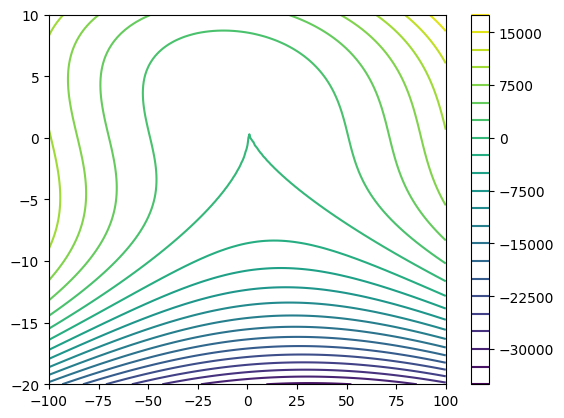

In [35]:
import matplotlib.pyplot as plt 
import numpy as np 

x1 = np.linspace(-100, 100, 100) 
x2 = np.linspace(-20, 10, 100)

X1, X2 = np.meshgrid(x1, x2) 

def objs(x): 
    x1, x2 = x
    return (x1**2 - 2*x1 + 3*x1*x2 + 4*x2**3) 

Z = objs( (X1, X2 )) 


plt.contour(X1, X2, Z, levels = 20, cmap = "viridis")
plt.colorbar()

A local minima doesnt exist

Task 2

$$
f(x) = x_1^2 - 2x_1 + 3x_1x_2 + 4x_2^3
$$

$$
\nabla f(x) = \begin{pmatrix} 2x_1 - 2 + 3x_2  \\ 3x_1 + 12x_2^2 \end{pmatrix}
$$

Task 3

$$
H(x) = \begin{pmatrix}
 2 & 3 \\ 
 3 & 24x_2
\end{pmatrix}
$$

Task 4

In [ ]:
def dob(x): 
    return np.array([
        np.sum(x * np.array([2,3])) - 2, 
        3*x[0] + 12*(x[1]**2)
    ])

def ddob(x): 
    return np.array([
        [2,3], 
        [3, 24*x[1]]
        ])
x = np.array([1, 2])

def fun_ex1(x): 
    return (
        objs(x=x), 
        dob(x=x), 
        ddob(x = x)
    )

(np.int64(37),
 array([ 6, 51]),
 array([[ 2,  3],
        [ 3, 48]]))

Task 5

In [49]:
def grad(x, etol = 0.001): 
    xpos = x[0] + etol
    xneg = x[0] - etol 

    f1 = ( objs( (xpos, x[1])) - objs( (xneg, x[1])) ) 

    xpos = x[1] + etol
    xneg = x[1] - etol 

    f2 = ( objs( (x[0], xpos)) - objs( ( x[0], xneg)) ) 

    return (f1/(2*etol), f2/(2*etol))




x0 = np.array([2, 3]) 
f, df, ddf = fun_ex1(x = x0) 

print(f"Approx grad is: {grad(x0, etol=0.1)}")

print(f"Real grad is: {df}")

Approx grad is: (np.float64(11.000000000000014), np.float64(114.0400000000001))
Real grad is: [ 11 114]


In [44]:
import sympy as sp 

g1, g2 = sp.symbols("g1 g2")

fg = g1**2 - 2*g1 + 3*g1*g2 + 4*g2**3

# Gradient as a vector
grad_fg = sp.Matrix([sp.diff(fg, g1), sp.diff(fg, g2)])
print(grad_fg)

# Or compute derivatives separately
dfg_dg1 = sp.diff(fg, g1)
dfd_dg2 = sp.diff(fg, g2)
print(f"∂f/∂g1 = {dfg_dg1}")
print(f"∂f/∂g2 = {dfd_dg2}")

Matrix([[2*g1 + 3*g2 - 2], [3*g1 + 12*g2**2]])
∂f/∂g1 = 2*g1 + 3*g2 - 2
∂f/∂g2 = 3*g1 + 12*g2**2


In [45]:
hessian = sp.hessian(fg, (g1, g2))
print(hessian)

Matrix([[2, 3], [3, 24*g2]])


## Problem 2

Task 1

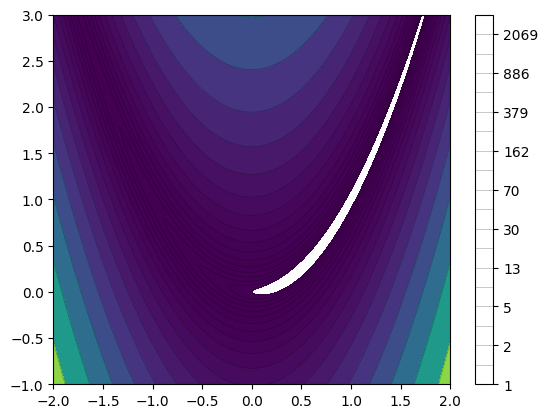

In [78]:
p = np.array([100, 1])

def obj(x, p): 
    return p[0] * ( (x[1] - x[0]**2))**2 + p[1]*(1 - x[0])**2 


# Better range focused on the interesting area
x1 = np.linspace(-2, 2, 300) 
x2 = np.linspace(-1, 3, 300)

X1, X2 = np.meshgrid(x1, x2) 
Z = obj( (X1, X2 ), p=p) 


levels = np.logspace(0, 3.5, 20)
plt.contourf(X1, X2, Z, levels=levels, cmap="viridis")  # Filled
lines = plt.contour(X1, X2, Z, levels=levels, colors='black', alpha=0.3, linewidths=0.5)  # Lines on top
plt.colorbar(lines)

/var/folders/6x/jpylqzgs1yq2q_xtb9dv1lym0000gn/T/ipykernel_92841/3314395663.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


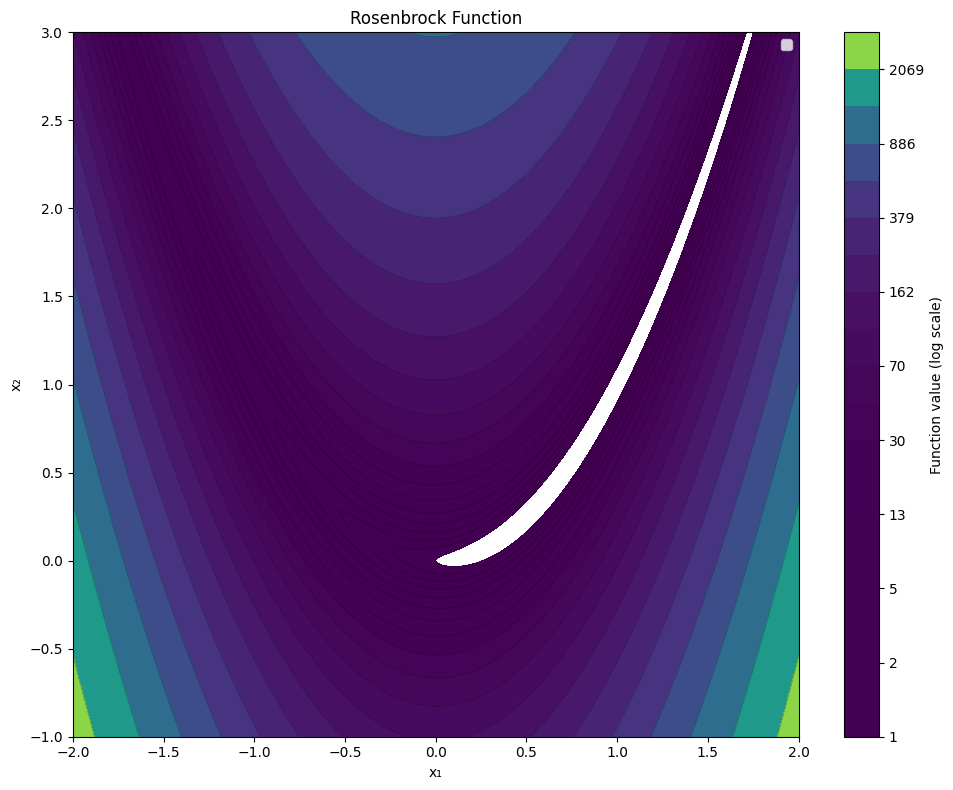

In [82]:
p = np.array([100, 1])

def obj(x, p): 
    return p[0] * ( (x[1] - x[0]**2))**2 + p[1]*(1 - x[0])**2 

# Better range focused on the interesting area
x1 = np.linspace(-2, 2, 700) 
x2 = np.linspace(-1, 3, 700)

X1, X2 = np.meshgrid(x1, x2) 
Z = obj((X1, X2), p=p) 

# Create figure with better styling
fig, ax = plt.subplots(figsize=(10, 8))

# Use logarithmic scale for better visibility
levels = np.logspace(0, 3.5, 20)
contour = ax.contourf(X1, X2, Z, levels=levels, cmap="viridis")
contour_lines = ax.contour(X1, X2, Z, levels=levels, colors='black', alpha=0.3, linewidths=0.5)


# Add colorbar
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Function value (log scale)')

ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_title('Rosenbrock Function')
ax.legend()
plt.tight_layout()
plt.show()

Task 2 and 3

$$f(x) = p_1(x_2 - x_1^2)^2 + p_2(1 - x_1)^2$$

where $p = [100, 1]$

Gradient: 

$$
\nabla f = \begin{pmatrix} 
400(x_2x_1 - x_1^3) + 2 \\ 
200(x_2 + x_1^2) 
\end{pmatrix}

$$

Hessian

$$

H(x) = \begin{pmatrix}
-1200x_1^2 + 400x_2 & 400x_1 \\
400x_1 & 200 \\

\end{pmatrix}
$$

Task 4

In [81]:
def fun2(x): 
    p = np.array([100, 1])
    return (obj(x =x, p=p))  

def df2(x): 
    return np.array([
        400*(x[0]*x[1] - x[0]**2) + 2, 
        200*(x[1] + x[0]**2)
    ])





def grad2(x, etol = 0.001): 
    xpos = x[0] + etol
    xneg = x[0] - etol 

    f1 = ( fun2((xpos, x[1])) - fun2( (xneg, x[1])) ) 

    xpos = x[1] + etol
    xneg = x[1] - etol 

    f2 = ( fun2( (x[0], xpos)) - fun2( ( x[0], xneg)) ) 

    return (f1/(2*etol), f2/(2*etol))




x0 = np.array([2, 3]) 

f = df2(x = x0) 

print(f"Approx grad is: {grad(x0, etol=0.1)}")

print(f"Real grad is: {df}")


Approx grad is: (np.float64(11.000000000000014), np.float64(114.0400000000001))
Real grad is: [ 11 114]


## Problem 3

$$
c_1(x) = (e^{x_1} ,  -1)  
$$

$$
c_2(x) = (2x_1, -2)
$$

$$

$$